In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
#laod data both train and test
train = pd.read_csv("C:/Users/judyw/Downloads/titanic/train.csv")
test =  pd.read_csv("C:/Users/judyw/Downloads/titanic/test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
t = train['Sex'].value_counts(normalize = True)
print(t)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Male Vs Female(test_set)')

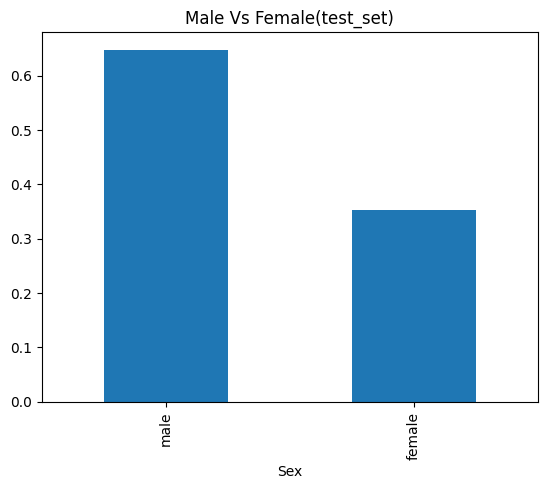

In [6]:
#our assumption is that all men died and all women survived
t.plot( kind = 'bar')
plt.title('Male Vs Female(test_set)')

In [7]:
#percentage of wome that survived out of all the women that are in the train set
women = train.loc[train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print(rate_women)


0.7420382165605095


In [8]:
#percentage of men that survived out of all the men that are in the train test
men = train.loc[train.Sex == 'male']['Survived']
rate_women = sum(men)/len(men)
print(rate_women)                         

0.18890814558058924


In [9]:
#split data
y = train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [10]:
#instantiate model

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X, y)


RandomForestClassifier(max_depth=5, random_state=42)

In [11]:
#prediction
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [12]:
df = pd.read_csv("C:/Users/judyw/Downloads/submission.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    int64 
 2   Sex          418 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.9+ KB


Text(0.5, 1.0, 'Survived Male Vs Female')

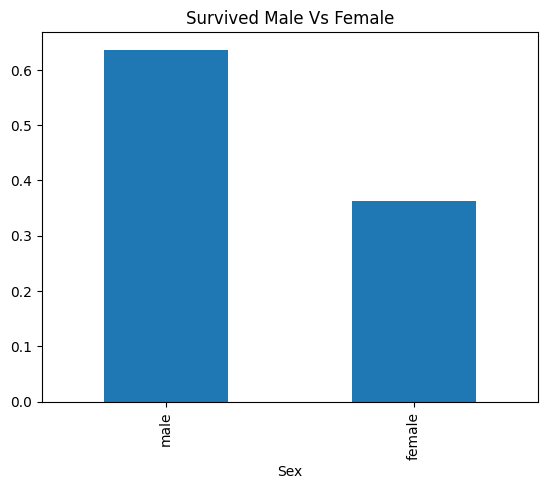

In [19]:
S = df['Sex'].value_counts(normalize = True)
S.plot( kind = 'bar')
plt.title('Survived Male Vs Female')

In [15]:
men = df.loc[train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print("rate_men", rate_men)   

women = df.loc[df.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print("rate_women", rate_women)  

rate_men 0.35271317829457366
rate_women 0.9473684210526315
